In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [4]:
# 目的変数[SalePrice]の基本統計量を表示
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
# trainの欠損値を確認
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# trainの欠損値を None に置換する
train_none_fill_lists = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

for none_list in train_none_fill_lists:
  train[none_list] = train[none_list].fillna('None')

In [9]:
# trainの欠損値を０に置換する
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

In [10]:
# trainの欠損値を最頻値に置換する
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [11]:
# trainの欠損値を平均値に置換する
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [12]:
# 削除する
train = train.drop('Utilities', axis=1)
train = train.drop('Id', axis=1)

In [13]:
# 欠損値が無くなっているか確認
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [15]:
# testの欠損値を確認
test.isnull().sum()[test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [16]:
# testの欠損値を None に置換する
test_none_fill_lists = ['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

for none_list in test_none_fill_lists:
  test[none_list] = test[none_list].fillna('None')

In [17]:
# testの欠損値を０に置換する
test_none_lists_zero = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

for none_list in test_none_lists_zero:
  test[none_list] = test[none_list].fillna(0)

In [18]:
# testの欠損値を最頻値に置換する
test_none_lists_mode = ['MSZoning', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'KitchenQual', 'Functional', 'SaleType']

for none_list in test_none_lists_mode:
  test[none_list] = test[none_list].fillna(test[none_list].mode()[0])

In [19]:
# testの欠損値を平均値に置換する
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [20]:
# 削除する
test = test.drop('Utilities', axis=1)
test = test.drop('Id', axis=1)

In [21]:
# 欠損値が無くなっているか確認
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

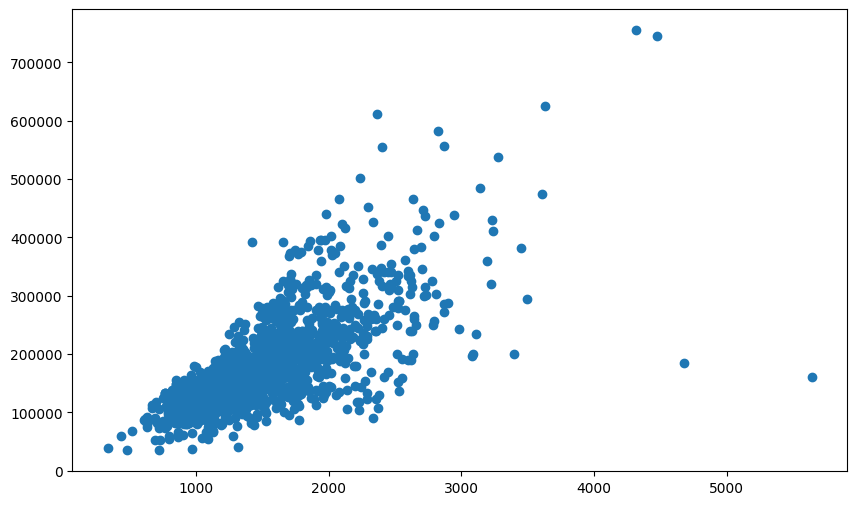

In [22]:
# "GrLivArea"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.show()

In [23]:
# "GrLivArea"4000以上, "SalePrice"500000以下を外れ値として削除
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 500000)].index)

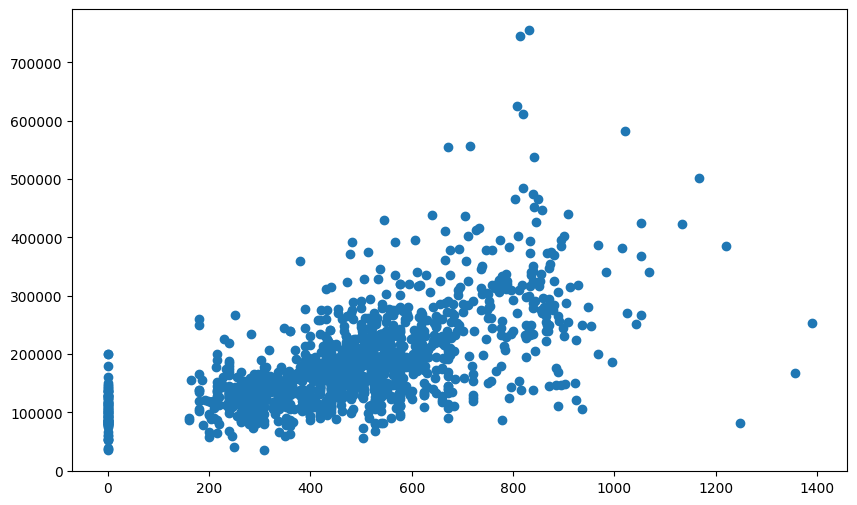

In [24]:
# "GarageArea"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['GarageArea'], train['SalePrice'])
plt.show()

In [25]:
# "GarageArea"1200以上, "SalePrice"300000以下を外れ値として削除
train = train.drop(train[(train['GarageArea'] > 1200) & (train['SalePrice'] < 300000)].index)

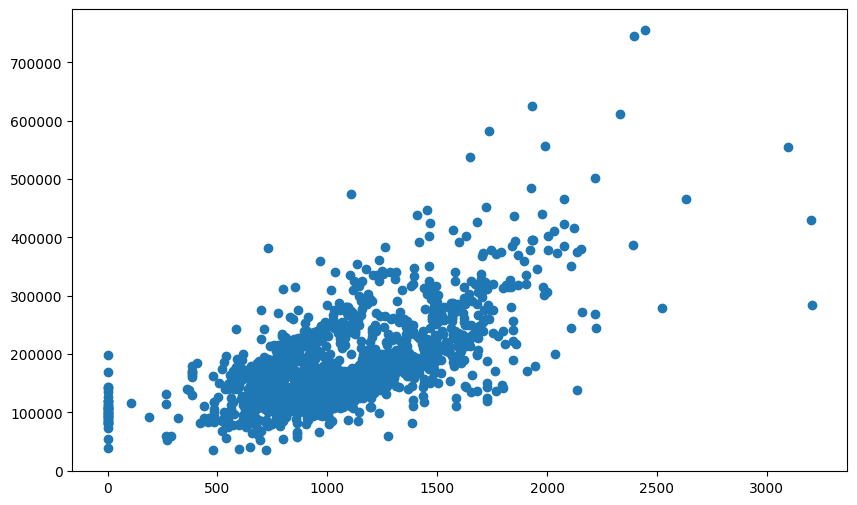

In [26]:
# "TotalBsmtSF"外れ値確認
plt.figure(figsize=(10, 6))
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.show()

In [27]:
# "TotalBsmtSF"3000以上, "SalePrice"600000以下を外れ値として削除
train = train.drop(train[(train['TotalBsmtSF'] > 3000) & (train['SalePrice'] < 600000)].index)

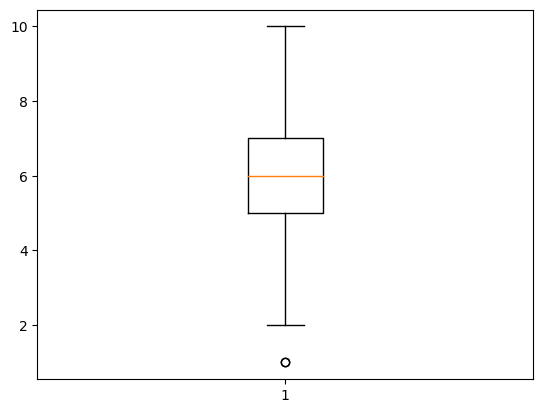

In [52]:
#  "OverallQual"の外れ値確認
fig, ax = plt.subplots()
ax.boxplot(train['OverallQual'])
plt.show()

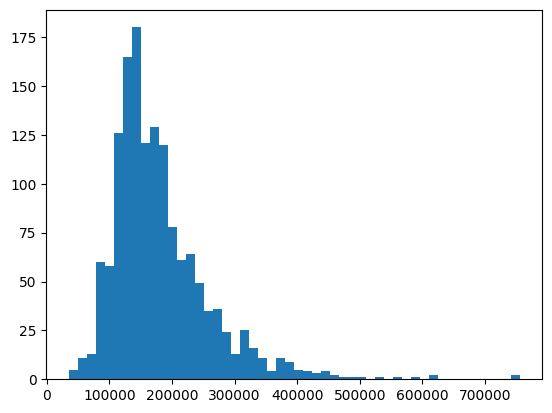

In [33]:
# 目的変数[SalePrice]を可視化
plt.hist(train['SalePrice'], bins=50)
plt.show()

In [35]:
# 歪度と尖度を確認
skewness = train['SalePrice'].skew()
kurtosis = train['SalePrice'].kurtosis()
print(f'歪度:{skewness:.2f}')
print(f'尖度:{kurtosis:.2f}')

歪度:1.87
尖度:6.59


In [40]:
# SalePriceの対数変換
train['SalePrice'] = np.log(train['SalePrice'])

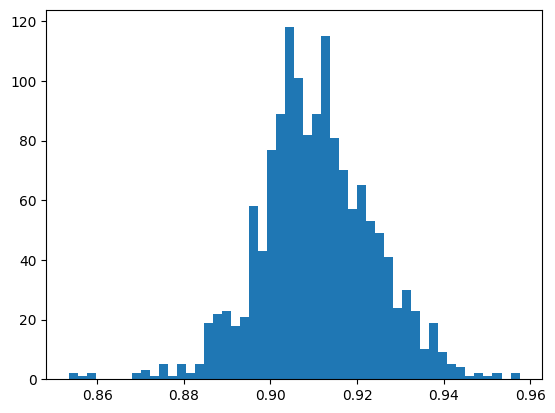

In [42]:
# 対数変換後の目的変数[SalePrice]を可視化
plt.hist(train['SalePrice'], bins=50)
plt.show()

In [43]:
# 特徴量を'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'ExterQual'に絞る
train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'ExterQual']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  1452 non-null   int64 
 1   GrLivArea    1452 non-null   int64 
 2   GarageCars   1452 non-null   int64 
 3   TotalBsmtSF  1452 non-null   int64 
 4   GarageArea   1452 non-null   int64 
 5   1stFlrSF     1452 non-null   int64 
 6   ExterQual    1452 non-null   object
dtypes: int64(6), object(1)
memory usage: 90.8+ KB


In [44]:
# ExterQualを数値化
train['ExterQual'].value_counts()

ExterQual
TA    905
Gd    486
Ex     48
Fa     13
Name: count, dtype: int64

In [45]:
train['ExterQual'] = train['ExterQual'].replace({'TA':0, 'Gd':1, 'Ex':2, 'Fa':3})
train['ExterQual'].value_counts()

ExterQual
0    905
1    486
2     48
3     13
Name: count, dtype: int64

In [46]:
# 学習データの特徴量、目的変数を取得
train_features = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'ExterQual']].values
train_target = train['SalePrice'].values

In [47]:
# test[ExterQual]の数値化
test['ExterQual'] = test['ExterQual'].replace({'TA':0, 'Gd':1, 'Ex':2, 'Fa':3})
test['ExterQual'].value_counts()

ExterQual
0    892
1    491
2     55
3     21
Name: count, dtype: int64

In [48]:
# テストデータの特徴量を取得
test_features = test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'ExterQual']].values

In [49]:
# 線形回帰分析
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
# モデルの学習
model.fit(train_features, train_target)

LinearRegression()

In [51]:
# テストデータによる予測
predict_test_target = model.predict(test_features)
print(predict_test_target)

[0.90010935 0.90806351 0.90691404 ... 0.90636748 0.89466407 0.92110699]


In [ ]:
# 提出フォーマットに変換
# submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predict_test_target})
# submission.to_csv("submission_HousePrices_AdvancedRegressionTechniques_3.csv", index=False)